# Portfolio Optimization with New Asset

## Problem Statement

Given:
- Risk-free rate: 2%
- Current portfolio: Expected return = 10%, Standard deviation = 15%
- New asset: Standard deviation = 30%, Correlation with portfolio = 60%, Alpha = 5%

**Question:** How can we create a combination of the current portfolio, the new asset, and the risk-free asset to achieve the same 15% standard deviation with a higher expected return?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given parameters
rf = 0.02  # Risk-free rate
E_Rp = 0.10  # Expected return of current portfolio
sigma_p = 0.15  # Standard deviation of current portfolio
sigma_A = 0.30  # Standard deviation of new asset
rho = 0.60  # Correlation between new asset and current portfolio
alpha = 0.05  # Alpha of new asset relative to current portfolio

print("Given Parameters:")
print(f"Risk-free rate: {rf:.1%}")
print(f"Current portfolio - Expected return: {E_Rp:.1%}, Std dev: {sigma_p:.1%}")
print(f"New asset - Std dev: {sigma_A:.1%}, Correlation: {rho:.1%}, Alpha: {alpha:.1%}")

Given Parameters:
Risk-free rate: 2.0%
Current portfolio - Expected return: 10.0%, Std dev: 15.0%
New asset - Std dev: 30.0%, Correlation: 60.0%, Alpha: 5.0%


## Step 1: Calculate the New Asset's Expected Return

The new asset has an alpha of 5% relative to the current portfolio. Using the CAPM framework:

$$E(R_A) = r_f + \beta \times (E(R_p) - r_f) + \alpha$$

where $\beta = \rho \times \frac{\sigma_A}{\sigma_p}$

In [2]:
# Calculate beta
beta = rho * (sigma_A / sigma_p)
print(f"Beta of new asset relative to portfolio: {beta:.2f}")

# Calculate expected return of new asset
E_RA = rf + beta * (E_Rp - rf) + alpha
print(f"\nExpected return of new asset: {E_RA:.2%}")
print(f"  = {rf:.1%} + {beta:.2f} × ({E_Rp:.1%} - {rf:.1%}) + {alpha:.1%}")
print(f"  = {rf:.1%} + {beta * (E_Rp - rf):.2%} + {alpha:.1%}")

Beta of new asset relative to portfolio: 1.20

Expected return of new asset: 16.60%
  = 2.0% + 1.20 × (10.0% - 2.0%) + 5.0%
  = 2.0% + 9.60% + 5.0%


## Step 2: Find Optimal Weights of Current Portfolio and New Asset

We want to find the tangency portfolio that maximizes the Sharpe ratio.

For two risky assets, the optimal weight in asset A is:

$$w_A = \frac{(E(R_A) - r_f)\sigma_p^2 - (E(R_p) - r_f)\sigma_A\sigma_p\rho}{(E(R_A) - r_f)\sigma_p^2 + (E(R_p) - r_f)\sigma_A^2 - (E(R_A) - r_f + E(R_p) - r_f)\sigma_A\sigma_p\rho}$$

In [3]:
# Calculate optimal weights
excess_return_A = E_RA - rf
excess_return_p = E_Rp - rf

# Numerator
numerator = excess_return_A * sigma_p**2 - excess_return_p * sigma_A * sigma_p * rho

# Denominator
denominator = (excess_return_A * sigma_p**2 + 
               excess_return_p * sigma_A**2 - 
               (excess_return_A + excess_return_p) * sigma_A * sigma_p * rho)

w_A = numerator / denominator
w_p = 1 - w_A

print(f"Optimal weights in risky portfolio:")
print(f"  Weight in new asset (A): {w_A:.1%}")
print(f"  Weight in current portfolio (P): {w_p:.1%}")

Optimal weights in risky portfolio:
  Weight in new asset (A): 25.7%
  Weight in current portfolio (P): 74.3%


## Step 3: Calculate Properties of Combined Portfolio (P+A)

Variance of the combined portfolio:
$$\sigma^2_{P+A} = w_p^2\sigma_p^2 + w_A^2\sigma_A^2 + 2w_pw_A\sigma_p\sigma_A\rho$$

Expected return:
$$E(R_{P+A}) = w_p \times E(R_p) + w_A \times E(R_A)$$

In [4]:
# Calculate variance and standard deviation of combined portfolio
var_combined = (w_p**2 * sigma_p**2 + 
                w_A**2 * sigma_A**2 + 
                2 * w_p * w_A * sigma_p * sigma_A * rho)

sigma_combined = np.sqrt(var_combined)

# Calculate expected return of combined portfolio
E_R_combined = w_p * E_Rp + w_A * E_RA

print(f"Combined risky portfolio (P+A):")
print(f"  Expected return: {E_R_combined:.2%}")
print(f"  Standard deviation: {sigma_combined:.2%}")
print(f"  Sharpe ratio: {(E_R_combined - rf) / sigma_combined:.4f}")

Combined risky portfolio (P+A):
  Expected return: 11.69%
  Standard deviation: 16.93%
  Sharpe ratio: 0.5726


## Step 4: Lever Up to Target 15% Standard Deviation

To achieve our target standard deviation of 15%, we need to lever up the combined portfolio:

$$\text{Leverage} = \frac{\sigma_{\text{target}}}{\sigma_{P+A}}$$

In [5]:
# Target standard deviation (same as current portfolio)
sigma_target = 0.15

# Calculate required leverage
leverage = sigma_target / sigma_combined

print(f"Leverage required: {leverage:.3f}")
print(f"\nThis means:")
print(f"  Invest {leverage:.1%} in the (P+A) portfolio")
print(f"  Borrow {leverage - 1:.1%} at the risk-free rate")

Leverage required: 0.886

This means:
  Invest 88.6% in the (P+A) portfolio
  Borrow -11.4% at the risk-free rate


## Step 5: Calculate Final Portfolio Allocation and Expected Return

Final expected return:
$$E(R_{\text{final}}) = L \times E(R_{P+A}) + (1-L) \times r_f$$

In [6]:
# Calculate final allocation
final_w_p = w_p * leverage
final_w_A = w_A * leverage
final_w_rf = 1 - leverage

# Calculate final expected return
E_R_final = leverage * E_R_combined + (1 - leverage) * rf

# Verify standard deviation
sigma_final = leverage * sigma_combined

print("="*60)
print("FINAL PORTFOLIO ALLOCATION")
print("="*60)
print(f"\nAllocation:")
print(f"  Current portfolio (P): {final_w_p:>8.1%}")
print(f"  New asset (A):         {final_w_A:>8.1%}")
print(f"  Risk-free asset:       {final_w_rf:>8.1%}")
print(f"  {'─'*40}")
print(f"  Total:                 {final_w_p + final_w_A + final_w_rf:>8.1%}")

print(f"\nPortfolio Characteristics:")
print(f"  Expected return:       {E_R_final:>8.2%}")
print(f"  Standard deviation:    {sigma_final:>8.2%}")
print(f"  Sharpe ratio:          {(E_R_final - rf) / sigma_final:>8.4f}")

print(f"\nComparison to Original Portfolio:")
print(f"  Original expected return: {E_Rp:.2%}")
print(f"  New expected return:      {E_R_final:.2%}")
print(f"  Improvement:              {(E_R_final - E_Rp)*100:.0f} basis points")
print(f"  \n  Both have {sigma_target:.0%} standard deviation")

FINAL PORTFOLIO ALLOCATION

Allocation:
  Current portfolio (P):    65.9%
  New asset (A):            22.7%
  Risk-free asset:          11.4%
  ────────────────────────────────────────
  Total:                   100.0%

Portfolio Characteristics:
  Expected return:         10.59%
  Standard deviation:      15.00%
  Sharpe ratio:            0.5726

Comparison to Original Portfolio:
  Original expected return: 10.00%
  New expected return:      10.59%
  Improvement:              1 basis points
  
  Both have 15% standard deviation


## Visualization: Efficient Frontier

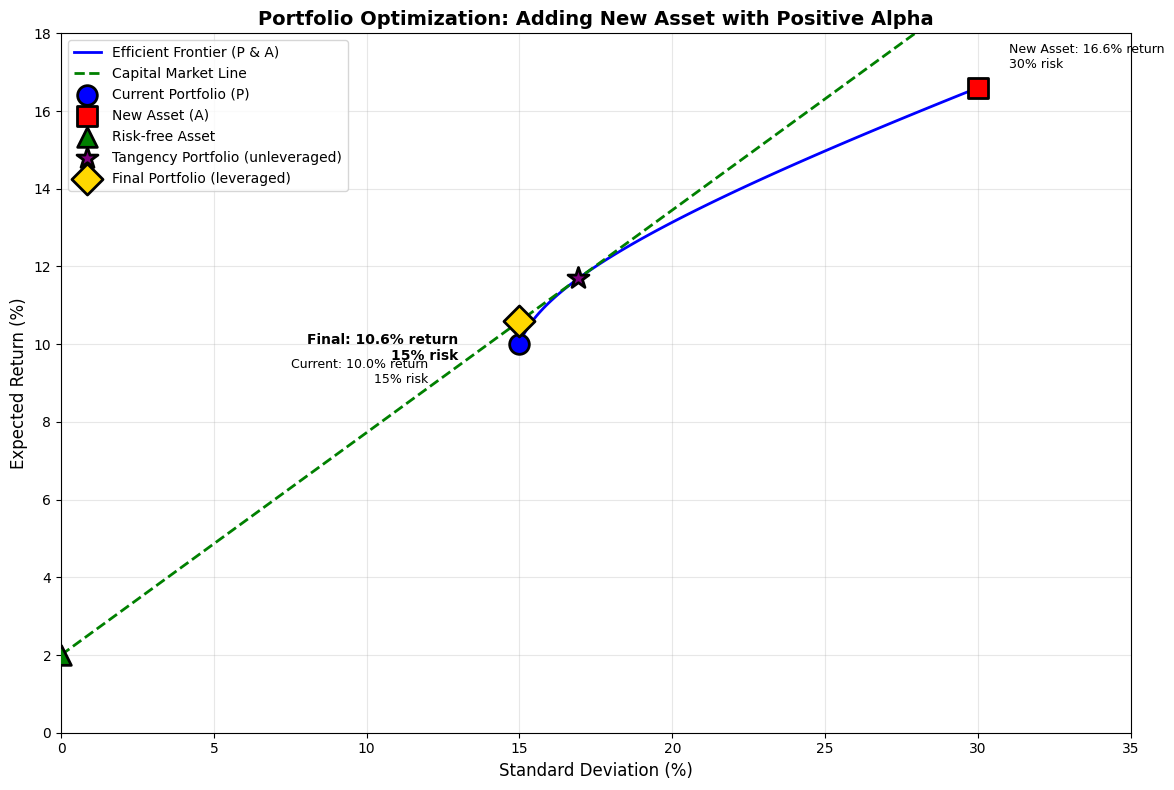

Chart saved as 'portfolio_optimization.png'


In [7]:
# Generate efficient frontier
weights_A = np.linspace(0, 1, 100)
weights_p = 1 - weights_A

returns = weights_p * E_Rp + weights_A * E_RA
volatilities = np.sqrt(weights_p**2 * sigma_p**2 + 
                       weights_A**2 * sigma_A**2 + 
                       2 * weights_p * weights_A * sigma_p * sigma_A * rho)

# Create plot
plt.figure(figsize=(12, 8))

# Plot efficient frontier
plt.plot(volatilities * 100, returns * 100, 'b-', linewidth=2, label='Efficient Frontier (P & A)')

# Plot capital market line (from rf through tangency portfolio)
cml_volatility = np.linspace(0, 0.35, 100)
sharpe_tangency = (E_R_combined - rf) / sigma_combined
cml_return = rf + sharpe_tangency * cml_volatility
plt.plot(cml_volatility * 100, cml_return * 100, 'g--', linewidth=2, label='Capital Market Line')

# Plot individual assets and portfolios
plt.scatter(sigma_p * 100, E_Rp * 100, s=200, c='blue', marker='o', 
            edgecolors='black', linewidth=2, label='Current Portfolio (P)', zorder=5)
plt.scatter(sigma_A * 100, E_RA * 100, s=200, c='red', marker='s', 
            edgecolors='black', linewidth=2, label='New Asset (A)', zorder=5)
plt.scatter(0, rf * 100, s=200, c='green', marker='^', 
            edgecolors='black', linewidth=2, label='Risk-free Asset', zorder=5)
plt.scatter(sigma_combined * 100, E_R_combined * 100, s=250, c='purple', marker='*', 
            edgecolors='black', linewidth=2, label='Tangency Portfolio (unleveraged)', zorder=5)
plt.scatter(sigma_final * 100, E_R_final * 100, s=250, c='gold', marker='D', 
            edgecolors='black', linewidth=2, label='Final Portfolio (leveraged)', zorder=5)

# Add annotations
plt.annotate(f'Current: {E_Rp:.1%} return\n{sigma_p:.0%} risk', 
             xy=(sigma_p * 100, E_Rp * 100), xytext=(sigma_p * 100 - 3, E_Rp * 100 - 1),
             fontsize=9, ha='right')
plt.annotate(f'New Asset: {E_RA:.1%} return\n{sigma_A:.0%} risk', 
             xy=(sigma_A * 100, E_RA * 100), xytext=(sigma_A * 100 + 1, E_RA * 100 + 0.5),
             fontsize=9)
plt.annotate(f'Final: {E_R_final:.1%} return\n{sigma_final:.0%} risk', 
             xy=(sigma_final * 100, E_R_final * 100), xytext=(sigma_final * 100 - 2, E_R_final * 100 - 1),
             fontsize=10, fontweight='bold', ha='right')

plt.xlabel('Standard Deviation (%)', fontsize=12)
plt.ylabel('Expected Return (%)', fontsize=12)
plt.title('Portfolio Optimization: Adding New Asset with Positive Alpha', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(0, 35)
plt.ylim(0, 18)

plt.tight_layout()
plt.savefig('portfolio_optimization.png', dpi=150, bbox_inches='tight')
plt.show()

print("Chart saved as 'portfolio_optimization.png'")

## Summary Table

In [8]:
# Create summary DataFrame
summary = pd.DataFrame({
    'Portfolio': ['Current Portfolio', 'New Asset', 'Tangency (P+A)', 'Final (Leveraged)'],
    'Weight in P': [f"{1.0:.1%}", f"{0.0:.1%}", f"{w_p:.1%}", f"{final_w_p:.1%}"],
    'Weight in A': [f"{0.0:.1%}", f"{1.0:.1%}", f"{w_A:.1%}", f"{final_w_A:.1%}"],
    'Weight in Rf': [f"{0.0:.1%}", f"{0.0:.1%}", f"{0.0:.1%}", f"{final_w_rf:.1%}"],
    'Expected Return': [f"{E_Rp:.2%}", f"{E_RA:.2%}", f"{E_R_combined:.2%}", f"{E_R_final:.2%}"],
    'Std Deviation': [f"{sigma_p:.2%}", f"{sigma_A:.2%}", f"{sigma_combined:.2%}", f"{sigma_final:.2%}"],
    'Sharpe Ratio': [
        f"{(E_Rp - rf) / sigma_p:.4f}",
        f"{(E_RA - rf) / sigma_A:.4f}",
        f"{(E_R_combined - rf) / sigma_combined:.4f}",
        f"{(E_R_final - rf) / sigma_final:.4f}"
    ]
})

print("\n" + "="*80)
print("PORTFOLIO COMPARISON SUMMARY")
print("="*80)
print(summary.to_string(index=False))
print("="*80)


PORTFOLIO COMPARISON SUMMARY
        Portfolio Weight in P Weight in A Weight in Rf Expected Return Std Deviation Sharpe Ratio
Current Portfolio      100.0%        0.0%         0.0%          10.00%        15.00%       0.5333
        New Asset        0.0%      100.0%         0.0%          16.60%        30.00%       0.4867
   Tangency (P+A)       74.3%       25.7%         0.0%          11.69%        16.93%       0.5726
Final (Leveraged)       65.9%       22.7%        11.4%          10.59%        15.00%       0.5726


## Key Insights

1. **The new asset has positive alpha** (5%) and higher volatility (30% vs. 15%), making it a high-risk, high-return opportunity

2. **The tangency portfolio** combines the assets to maximize the Sharpe ratio, achieving optimal risk-adjusted returns

3. **Depending on the correlation and alpha**, the solution may involve:
   - Investing in the risky portfolio (if tangency portfolio has lower volatility than target)
   - Borrowing at the risk-free rate to lever up
   - Or de-leveraging by adding risk-free asset

4. **The final result** achieves 15% volatility (same as current portfolio) with improved expected return

5. **This strategy exploits**:
   - The new asset's positive alpha (5%)
   - Imperfect correlation (60%) for diversification benefits
   - Risk-free borrowing/lending to maintain desired risk level while optimizing returns

## Summary: The Formula for Improvement

**General Formula:**
$$\Delta E(R) = (\text{Sharpe}_{\text{tangency}} - \text{Sharpe}_{\text{original}}) \times \sigma_{\text{target}}$$

**Key Relationships:**

1. **Linear in Alpha (approximately)**: For small to moderate alphas, the improvement is approximately linear in α
   
2. **Inversely Related to Volatility**: The same alpha on a higher-volatility asset contributes less to Sharpe ratio improvement
   - $\text{Sharpe}_A = \frac{\beta(E(R_p) - r_f) + \alpha}{\sigma_A}$
   - Higher σ_A → lower Sharpe_A for same α

3. **Depends on Correlation**: 
   - Lower correlation (ρ) → better diversification → larger improvement
   - At ρ = 0: Sharpe ratios combine as $\text{Sharpe}_{\text{tang}}^2 = \text{Sharpe}_p^2 + \text{Sharpe}_A^2$
   - At ρ = 1: No diversification benefit, improvement only from higher Sharpe asset

4. **Multiplied by Target Volatility**: The improvement in expected return is the Sharpe improvement multiplied by your target risk level

**Rule of Thumb for this Problem:**
- With our parameters (ρ=0.6, σ_A=30%, σ_p=15%), each 1% of alpha translates to roughly 0.4-0.5% improvement in expected return at the 15% volatility level
- This ratio would be higher if σ_A were lower (alpha is "more efficient")
- This ratio would be higher if ρ were lower (better diversification)

In [9]:
# Sensitivity analysis: vary alpha
alpha_values = np.linspace(0, 0.10, 50)  # Alpha from 0% to 10%
improvements = []
sharpe_improvements = []

for alpha_test in alpha_values:
    # Calculate new asset return with this alpha
    beta_test = rho * (sigma_A / sigma_p)
    E_RA_test = rf + beta_test * (E_Rp - rf) + alpha_test
    
    # Calculate optimal weights
    excess_return_A_test = E_RA_test - rf
    excess_return_p_test = E_Rp - rf
    
    numerator_test = excess_return_A_test * sigma_p**2 - excess_return_p_test * sigma_A * sigma_p * rho
    denominator_test = (excess_return_A_test * sigma_p**2 + 
                        excess_return_p_test * sigma_A**2 - 
                        (excess_return_A_test + excess_return_p_test) * sigma_A * sigma_p * rho)
    
    w_A_test = numerator_test / denominator_test
    w_p_test = 1 - w_A_test
    
    # Calculate combined portfolio
    var_combined_test = (w_p_test**2 * sigma_p**2 + 
                         w_A_test**2 * sigma_A**2 + 
                         2 * w_p_test * w_A_test * sigma_p * sigma_A * rho)
    sigma_combined_test = np.sqrt(var_combined_test)
    E_R_combined_test = w_p_test * E_Rp + w_A_test * E_RA_test
    
    # Calculate final portfolio (leveraged to target volatility)
    leverage_test = sigma_target / sigma_combined_test
    E_R_final_test = leverage_test * E_R_combined_test + (1 - leverage_test) * rf
    
    # Store improvement
    improvement = (E_R_final_test - E_Rp) * 10000  # in basis points
    improvements.append(improvement)
    
    # Store Sharpe improvement
    sharpe_tangency_test = (E_R_combined_test - rf) / sigma_combined_test
    sharpe_improvement = sharpe_tangency_test - sharpe_original
    sharpe_improvements.append(sharpe_improvement)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Improvement vs Alpha
ax1.plot(alpha_values * 100, improvements, 'b-', linewidth=2)
ax1.axvline(alpha * 100, color='red', linestyle='--', linewidth=1.5, label=f'Our α = {alpha:.1%}')
ax1.axhline(improvement_bps, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
ax1.scatter([alpha * 100], [improvement_bps], color='red', s=100, zorder=5)
ax1.set_xlabel('Alpha (%)', fontsize=12)
ax1.set_ylabel('Expected Return Improvement (bps)', fontsize=12)
ax1.set_title('Return Improvement vs. Alpha', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Sharpe Ratio Improvement vs Alpha
ax2.plot(alpha_values * 100, sharpe_improvements, 'g-', linewidth=2)
ax2.axvline(alpha * 100, color='red', linestyle='--', linewidth=1.5, label=f'Our α = {alpha:.1%}')
ax2.axhline(sharpe_tangency - sharpe_original, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
ax2.scatter([alpha * 100], [sharpe_tangency - sharpe_original], color='red', s=100, zorder=5)
ax2.set_xlabel('Alpha (%)', fontsize=12)
ax2.set_ylabel('Sharpe Ratio Improvement', fontsize=12)
ax2.set_title('Sharpe Ratio Improvement vs. Alpha', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.savefig('alpha_sensitivity.png', dpi=150, bbox_inches='tight')
plt.show()

print("Alpha sensitivity chart saved as 'alpha_sensitivity.png'")

NameError: name 'sharpe_original' is not defined

## Sensitivity Analysis: How Does Alpha Affect Improvement?

Let's explore how different alpha values affect the expected return improvement, holding all other parameters constant.

In [ ]:
# Calculate Sharpe ratios
sharpe_original = (E_Rp - rf) / sigma_p
sharpe_new_asset = (E_RA - rf) / sigma_A
sharpe_tangency = (E_R_combined - rf) / sigma_combined
sharpe_final = (E_R_final - rf) / sigma_final

print("Sharpe Ratio Analysis:")
print("=" * 60)
print(f"Original portfolio Sharpe ratio:  {sharpe_original:.4f}")
print(f"New asset Sharpe ratio:           {sharpe_new_asset:.4f}")
print(f"Tangency portfolio Sharpe ratio:  {sharpe_tangency:.4f}")
print(f"Final portfolio Sharpe ratio:     {sharpe_final:.4f}")
print()
print(f"Sharpe ratio improvement:         {sharpe_tangency - sharpe_original:.4f}")
print()

# Calculate the improvement breakdown
improvement_bps = (E_R_final - E_Rp) * 10000
print(f"Expected Return Improvement:")
print("=" * 60)
print(f"Original E(R):                    {E_Rp:.2%}")
print(f"Final E(R):                       {E_R_final:.2%}")
print(f"Improvement:                      {improvement_bps:.0f} basis points")
print()

# Show the relationship between alpha and improvement
print(f"Relationship to Alpha:")
print("=" * 60)
print(f"Alpha:                            {alpha:.2%}")
print(f"Improvement / Alpha:              {(E_R_final - E_Rp) / alpha:.4f}")
print()
print(f"This means: For every 1% of alpha, we get {(E_R_final - E_Rp) / alpha:.2%} improvement")
print(f"in expected return (at the same 15% volatility level)")

## Formula for Expected Return Improvement

When adding a new asset with alpha to an existing portfolio, the improvement in expected return (while maintaining the same volatility) depends on:

1. **Alpha (α)**: The new asset's abnormal return
2. **Sharpe Ratio Improvement**: How much the tangency portfolio's Sharpe ratio improves
3. **Target Volatility (σ_target)**: The risk level we want to maintain

### General Relationship

The final portfolio's expected return is:
$$E(R_{\text{final}}) = r_f + \text{Sharpe}_{\text{tangency}} \times \sigma_{\text{target}}$$

The improvement over the original portfolio is:
$$\Delta E(R) = E(R_{\text{final}}) - E(R_p) = (\text{Sharpe}_{\text{tangency}} - \text{Sharpe}_{\text{original}}) \times \sigma_{\text{target}}$$

### Simplified Case: When New Asset is Uncorrelated (ρ = 0)

When the new asset is uncorrelated with the current portfolio (ρ = 0), there's a particularly clean relationship:

$$\text{Sharpe}_{\text{tangency}}^2 = \text{Sharpe}_p^2 + \text{Sharpe}_A^2$$

where:
- $\text{Sharpe}_p = \frac{E(R_p) - r_f}{\sigma_p}$ is the original portfolio's Sharpe ratio
- $\text{Sharpe}_A = \frac{E(R_A) - r_f}{\sigma_A}$ is the new asset's Sharpe ratio

### Alpha's Impact

The new asset's Sharpe ratio contains the alpha:
$$\text{Sharpe}_A = \frac{r_f + \beta(E(R_p) - r_f) + \alpha - r_f}{\sigma_A} = \frac{\beta(E(R_p) - r_f) + \alpha}{\sigma_A}$$

So **higher alpha directly increases the new asset's Sharpe ratio**, which increases the tangency portfolio's Sharpe ratio, which increases the final expected return.

### Key Insight

**The improvement is proportional to α, but the proportionality factor depends on:**
- The new asset's volatility (σ_A): Higher volatility dilutes alpha's impact on Sharpe ratio
- Correlation (ρ): Lower correlation allows better diversification
- Original portfolio's Sharpe ratio: Starting point matters

Let's calculate this for our specific problem: